In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate


%matplotlib notebook 


# Single fold cross validation - linear regression

<IPython.core.display.Javascript object>


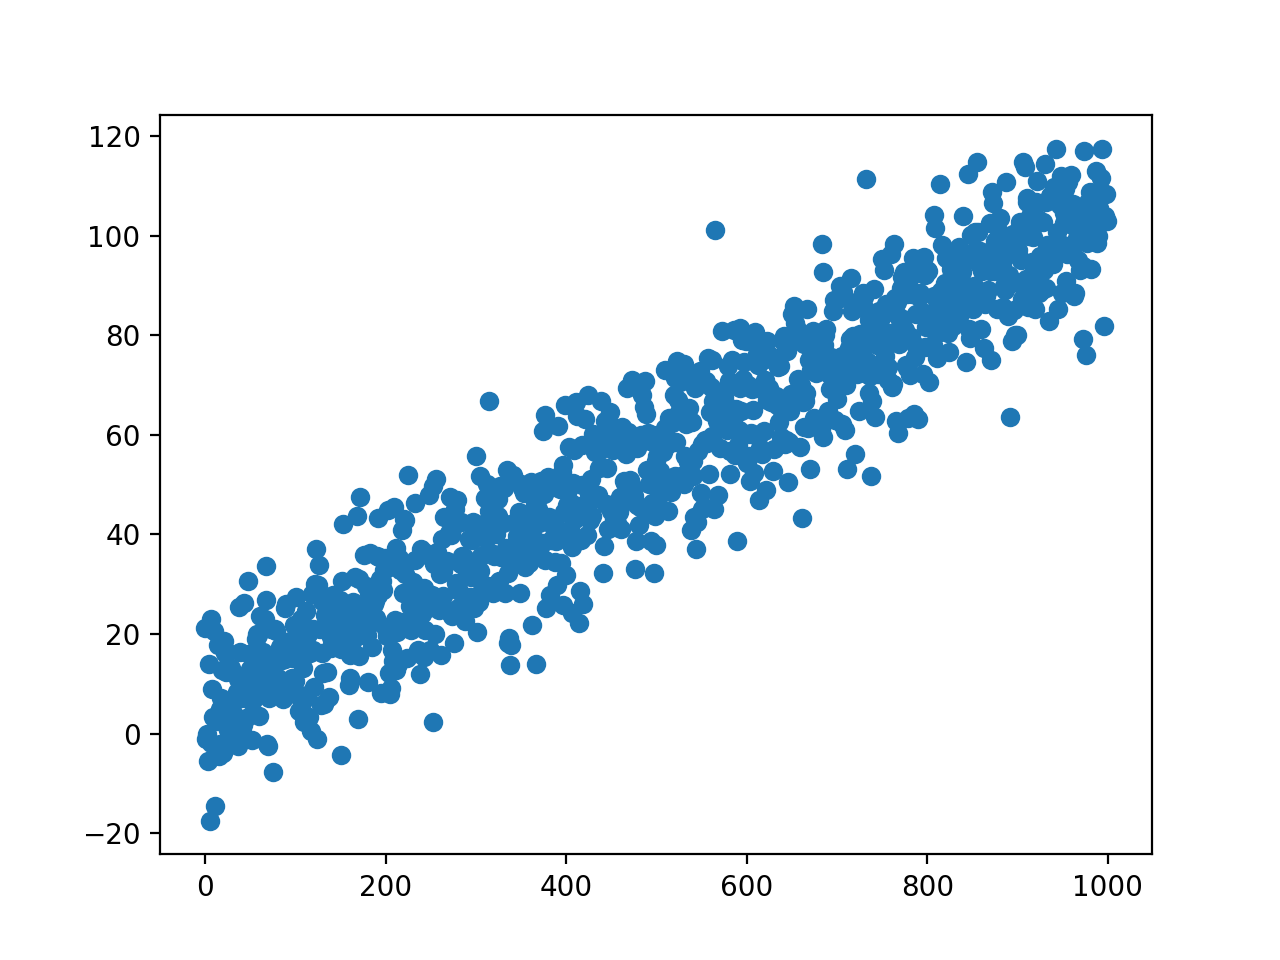

In [4]:
np.random.seed(1)
x = np.arange(0,1000)
noise = np.random.normal(0,10,1000)
slope = 0.1
b = 5.0 

y = (slope*x)+b 
y_noised =  y+noise
plt.figure()
plt.scatter(x,y_noised)
plt.show()


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y_noised, test_size=0.2, random_state=1)
x_train_shape = x_train.shape[0]
y_train_shape = y_train.shape[0]

x_train_reshaped = x_train.reshape(x_train_shape, 1)
y_train_reshaped = y_train.reshape(y_train_shape, 1)


x_test_shape = x_test.shape[0]
x_test_reshaped = x_test.reshape(x_test_shape, 1)

In [6]:
# fitting the model in sklearn 

lr = LinearRegression()
lr.fit(x_train_reshaped, y_train_reshaped)

pred_slope = lr.coef_
pred_b = lr.intercept_


<IPython.core.display.Javascript object>


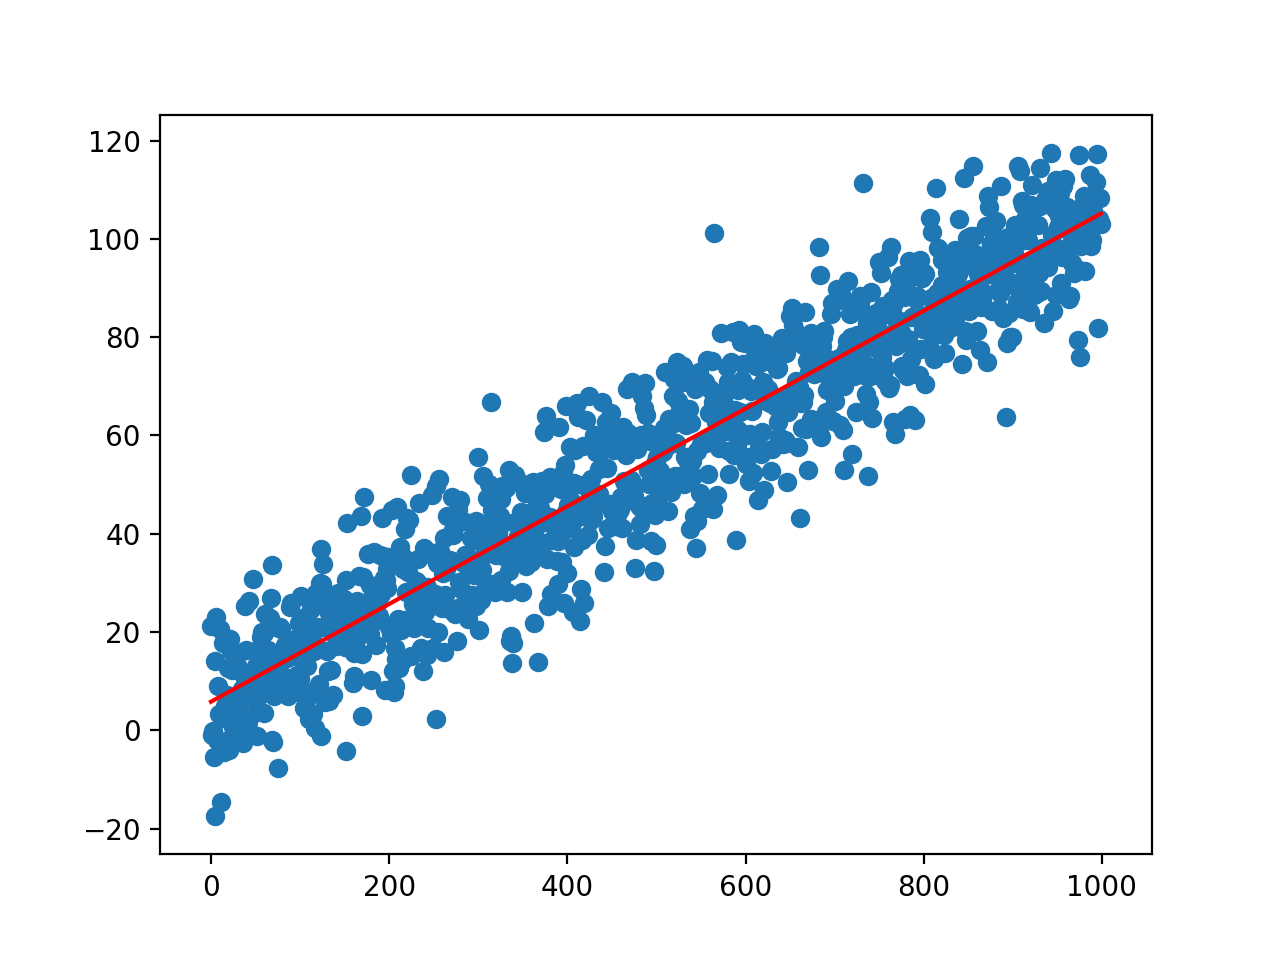

<IPython.core.display.Javascript object>


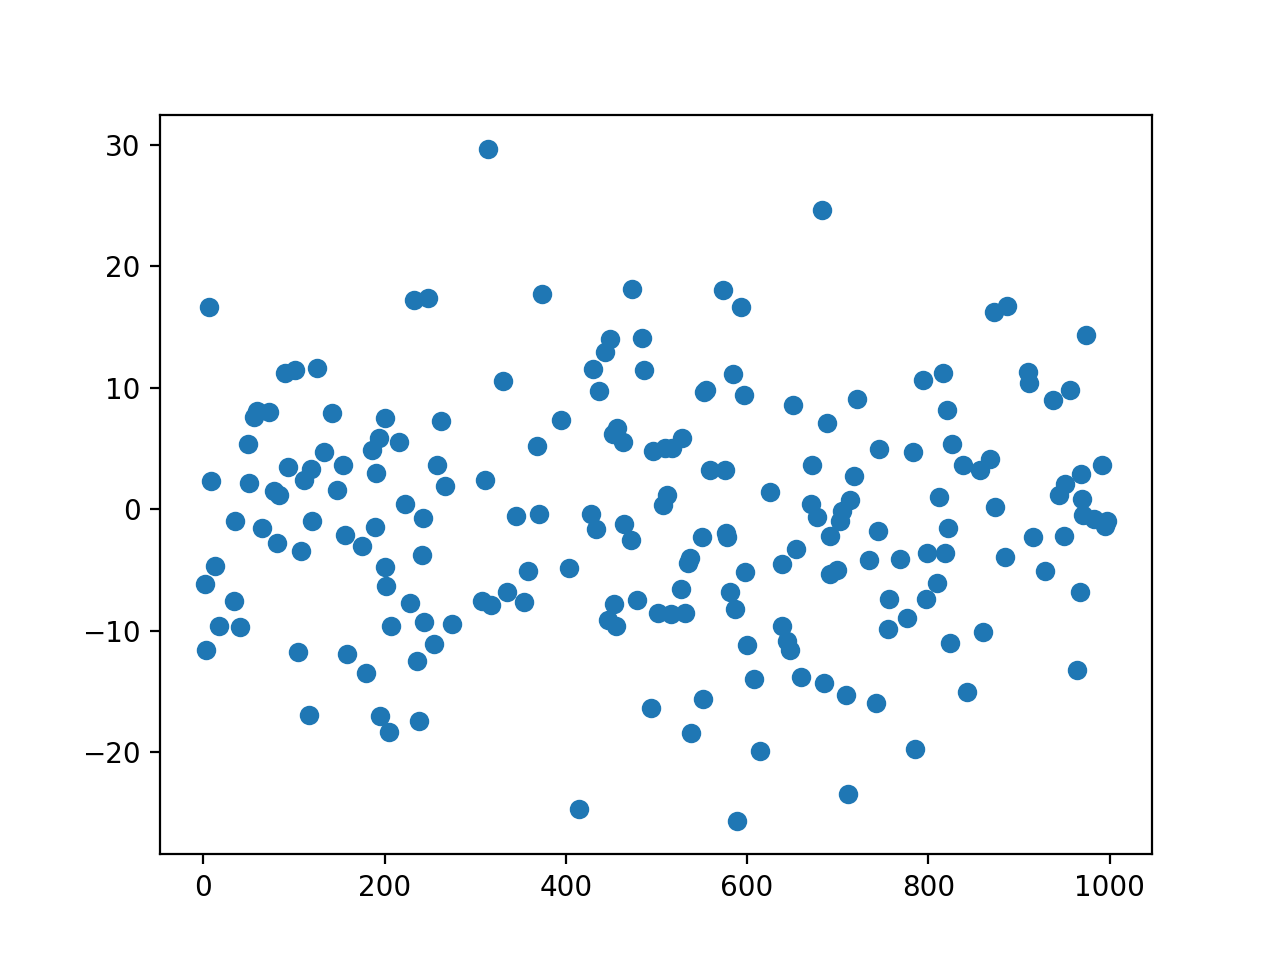

(91.31859463754672, 0.8986044477203021)

In [29]:
# fitting the model line to the data 
model_line = (pred_slope*x)+pred_b
model_line_reshaped = model_line.reshape(model_line.shape[1])
plt.figure()
plt.plot(x, model_line_reshaped, color="red")
plt.scatter(x, y_noised)

y_pred= lr.predict(x_test_reshaped)

residuals = y_test - y_pred.reshape(y_pred.shape[0],)
plt.figure()
plt.scatter(x_test,residuals)
plt.show()

mean_squared_error(y_test,  y_pred.reshape(y_pred.shape[0],)), r2_score(y_test,  y_pred.reshape(y_pred.shape[0],))

# K fold cross 

In [27]:
lr_cv = LinearRegression()
scoring = {'mse':make_scorer(mean_squared_error, greater_is_better=True),'r2':'r2' }
cross_validate(lr_cv, x_train_reshaped, y_train_reshaped, cv=5, scoring=scoring)

{'fit_time': array([1.18923187e-03, 3.79085541e-05, 1.19471550e-03, 5.06639481e-04,
        1.08265877e-03]),
 'score_time': array([0.00144434, 0.00122547, 0.00197554, 0.00100255, 0.0009129 ]),
 'test_mse': array([ 84.79447025,  99.50546866, 110.18499209,  89.64306528,
        104.43760956]),
 'test_r2': array([0.91352222, 0.89246001, 0.8775632 , 0.89683445, 0.88782505])}